# Project 1 - Exploring Potential Contributing Factors to Diabetes

This jupyter notebook contains the cleaning, analysis, and visualizations of the Diabetes Prediction Dataset on kaggle, by Mohammed Mustafa: 
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Contents

- **Importing and Cleaning the Data**
    - Importing the csv
    - Replacing 1/0 Values with True/False Values
    - Cleaning the smoking_history column
    - Dropping n/a values and checking value counts
    - Duplicates
    - Viewing the clean dataset

- **Analysis**
    - Summary Table 1 - Age, BMI, HbA1c Level, and Blood Glucose Level Among Diabetics and Non-Diabetics
    - Summary Table 2 - Diabetics with Hypertension, Heart Diease, Both, or Neither
    - Summary Table 3 - Diabetics that are at least 45 Years Old, 25+ BMI, Both, or Neither
    - Summary Table 4 - Diabetic Patients by Age Group
    - Summary Table 5 - Mean values for table attributes by gender

- **Visualizations**
    1. Diabetic Patients by BMI and Age
    2. Diabetic Patients by Heart Disease and Hypertension
    3. Diabetes by Age and BMI
    4. Age by Diabetes Status
    5. BMI by Diabetes Status
    6. HbA1c Level by Diabetes Status
    7. Blood Glucose Level by Diabetes Status

## Importing and Cleaning the Data

The first step was to import the dataframe from the csv, and save it to a new variable. Some of the columns in this dateset had 0 and 1 values, so these were replaced with True/False values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Resources/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


The hypertension, heart_disease, and diabetes columns all had ones and zeros, indicating the presence or absence of these conditions. To make these columns easier to understand, the values were changed to True/False, where True indicates the presence of a condition, and False indicates a lack of that condition.

In [2]:
# creating a new variable for the clean dataframe
clean_df = df

# converting hypertension, heart_disease, and diabetes columns to boolean values
# people either have them, or they don't
clean_df["hypertension"] = clean_df["hypertension"].replace({0: False, 1: True})
clean_df["heart_disease"] = clean_df["heart_disease"].replace({0: False, 1: True})
clean_df["diabetes"] = clean_df["diabetes"].replace({0: False, 1: True})

clean_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,False,True,never,25.19,6.6,140,False
1,Female,54.0,False,False,No Info,27.32,6.6,80,False
2,Male,28.0,False,False,never,27.32,5.7,158,False
3,Female,36.0,False,False,current,23.45,5.0,155,False
4,Male,76.0,True,True,current,20.14,4.8,155,False
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,False,False,No Info,27.32,6.2,90,False
99996,Female,2.0,False,False,No Info,17.37,6.5,100,False
99997,Male,66.0,False,False,former,27.83,5.7,155,False
99998,Female,24.0,False,False,never,35.42,4.0,100,False


The relevant columns are now set to boolean values. It's time to take a closer look at the values for each column.

Let's look at the value counts for the smoking_history column.

In [3]:
clean_df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

### About the smoking_history column

- In this column, some patients have been labeled as "ever". While this could be seen as a mistyping of "never", this cannot be confirmed. Because these rows are less than 5% of the dataset, they will be removed.

- We initially looked to see if the "no info" category needed to be removed. However, we decided not to do this, as that category makes up for approximately 30% of the data.

- It is odd that 15 patients under the age of 5 are currently smoking, and that 61 patients under 5 have smoked in the past. Because this cannot be verified, we decided to limit the scope of our study to adults 21 and older. This will allow us to better determine the contributing factors for diabetes.

In [4]:
# removing rows where smoking history is "ever"
clean_df = clean_df[clean_df["smoking_history"] != "ever"]

# limiting the scope of the study to adults over 21
clean_df = clean_df[clean_df["age"] > 21]

Let's drop the n/a values, as well as duplicate rows, and check the values for all of the categorical and boolean columns.

In [5]:
# dropping na values
clean_df = clean_df.dropna()

clean_df.drop_duplicates

list = ["gender", "hypertension", "heart_disease", "smoking_history", "diabetes"]
for x in list:
    print(clean_df[x].value_counts())

gender
Female    44929
Male      29039
Other        10
Name: count, dtype: int64
hypertension
False    66934
True      7044
Name: count, dtype: int64
heart_disease
False    70356
True      3622
Name: count, dtype: int64
smoking_history
never          29411
No Info        21018
former          9196
current         8725
not current     5628
Name: count, dtype: int64
diabetes
False    66065
True      7913
Name: count, dtype: int64


This is the cleaned dataset in its current form:

In [6]:
# checking remaining rows
clean_df.count()

gender                 73978
age                    73978
hypertension           73978
heart_disease          73978
smoking_history        73978
bmi                    73978
HbA1c_level            73978
blood_glucose_level    73978
diabetes               73978
dtype: int64

In [7]:
# viewing the current clean_df
clean_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,False,True,never,25.19,6.6,140,False
1,Female,54.0,False,False,No Info,27.32,6.6,80,False
2,Male,28.0,False,False,never,27.32,5.7,158,False
3,Female,36.0,False,False,current,23.45,5.0,155,False
4,Male,76.0,True,True,current,20.14,4.8,155,False
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,False,False,No Info,24.60,4.8,145,False
99995,Female,80.0,False,False,No Info,27.32,6.2,90,False
99997,Male,66.0,False,False,former,27.83,5.7,155,False
99998,Female,24.0,False,False,never,35.42,4.0,100,False


# Analysis - Summary Tables

Summary tables help give information at an overview. The first table shows summary statistics compared between patients with and without diabetes.

## Summary Table 1

### Age, BMI, HbA1c Level, and Blood Glucose Level Among Diabetics and Non-Diabetics


In [8]:
# creating a summary table comapring age, bmi, HbA1c levels, and blood glucose levels between people who have and don't have diabetes
summary_1 = clean_df.groupby("diabetes")[["age", "bmi", "HbA1c_level", "blood_glucose_level"]].agg(["mean", "median", "std"])

# transposing the dataframe so it is easier to read
summary_1.transpose()

diabetes                         False       True 
age                 mean     49.431424   61.704790
                    median   48.000000   63.000000
                    std      16.871571   13.548421
bmi                 mean     28.390095   32.118938
                    median   27.320000   30.060000
                    std       5.720954    7.537902
HbA1c_level         mean      5.395046    6.933148
                    median    5.800000    6.600000
                    std       0.971706    1.076005
blood_glucose_level mean    132.902596  194.387464
                    median  140.000000  160.000000
                    std      34.249222   58.689538

## Summary Table 2

### Diabetics with Hypertension, Heart Diease, Both, or Neither

This table looks at combinations of contributing factors for those with diabetes.

In [9]:
diabetes_df = clean_df[clean_df["diabetes"] == True]

summary_2 = diabetes_df.groupby(["heart_disease", "hypertension"])[["diabetes"]].count()

summary_2a = round(summary_2 / diabetes_df["diabetes"].count(), 2)

summary_2a

diabetes
heart_disease hypertension          
False         False             0.65
              True              0.21
True          False             0.11
              True              0.04

#### Based on this summary table:

- **65%** of diabetics in this dataset have **no heart disease or hypertension.**

- **21%** of diabetics in this dataset have **hypertension**, but **no heart disease.**

- **11%** of diabetics in this dataset have **heart disease**, but **no hypertension.**

- Only **4%** of diabetics in this dataset have **both hypertension and heart disease.**

## Summary Table 3

### Diabetics who are at least 45 Years Old, 25+ BMI, Both, or Neither

In [10]:
# 25 and over bmi, 45 and over age

summary_3 = diabetes_df.groupby([(diabetes_df["bmi"] >= 25), 
                                 (diabetes_df["age"] >= 45)])[["diabetes"]].count()

summary_3a = round(summary_3 / diabetes_df["diabetes"].count(), 2)

summary_3a


diabetes
bmi   age            
False False      0.01
      True       0.09
True  False      0.10
      True       0.80

#### Based on this summary table:

- **80%** of diabetics in this dataset are **45+** and have a **BMI of 25+.**

- **10%** of diabetics in this dataset are **under 45** with a **BMI of 25+.**

- **9%** of diabetics in this dataset are **45+**, but have a **BMI under 25.**

- Just **1%** of diabetics are **under 45** with a **BMI under 25.**

## Summary Table 4

### Diabetic Patients by Age Group

In [11]:
# Age category percentages:
def get_age_group(age):
   age = int(age)
   if age <= 24:
       return "<=24"
   elif age <= 34:
       return "25-34"
   elif age <= 44:
       return "35-44"
   else:
       return ">=45"
age_groups = diabetes_df['age'].apply(get_age_group)

# Display the percentage for each age group
age_group_counts = age_groups.value_counts()
print("Percentage for each age group:")
age_age_groups = round(((age_group_counts)/ len(diabetes_df) * 100), 2)
pd.DataFrame(age_age_groups)

# Round these numbers by 2!

Percentage for each age group:


,count
age,
>=45,88.34
35-44,7.84
25-34,3.36
<=24,0.47


### Based on this summary table:

The vast majority of patients with diabetes are **over the age of 45.**

## Summary Table 5

### Diabetic Patients by BMI Group

In [12]:
def get_bmi_group(bmi):
    bmi = int(bmi)
    if bmi <= 18.5:
        return "underweight"
    elif bmi <= 24.9:
        return "healthy_weight"
    elif bmi <= 29.9:
        return "overweight"
    else:
        return "obese"
bmi_groups = diabetes_df['bmi'].apply(get_bmi_group)
# Display the percenatage for each BMI group
bmi_group_counts = bmi_groups.value_counts()
print("Perecentage for each BMI group:")
bmi_age_groups = round(((bmi_group_counts)/ len(diabetes_df) * 100), 2)
pd.DataFrame(bmi_age_groups)

# Round these numbers by 2!

Perecentage for each BMI group:


,count
bmi,
obese,50.28
overweight,39.71
healthy_weight,9.38
underweight,0.63


### Based on this summary table:

Most patients with diabetes ahve a BMI that is either **overweight** or **obese**.

## Summary Table 5

### Mean values for table attributes by gender

In [13]:
# diabetes_df[diabetes_df["gender"] == "Female"]
summary_5 = diabetes_df.groupby("gender").mean("age")
summary_5 = summary_5.transpose()
summary_5["Difference"] = [summary_5["Female"][x] - summary_5["Male"][x] for x in range(len(summary_5["Female"]))]
summary_5

C:\Users\marsh\AppData\Local\Temp\ipykernel_30984\3948814313.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary_5["Difference"] = [summary_5["Female"][x] - summary_5["Male"][x] for x in range(len(summary_5["Female"]))]


gender,Female,Male,Difference
age,61.806536,61.590164,0.216372
hypertension,0.254294,0.243752,0.010542
heart_disease,0.118082,0.178984,-0.060902
bmi,32.771854,31.383378,1.388475
HbA1c_level,6.943368,6.921634,0.021734
blood_glucose_level,194.156966,194.647138,-0.490172
diabetes,1.000000,1.000000,0.000000


### Based on this summary table:

According to the data, there is little to no difference in these attributes between adult men and women.

# Visualizations

### 1. Diabetic Patients by BMI and Age

The main takeaway from this visualization is that approximately **80%** of diabetic adults are both 45+ and have a BMI of **at least 25**.

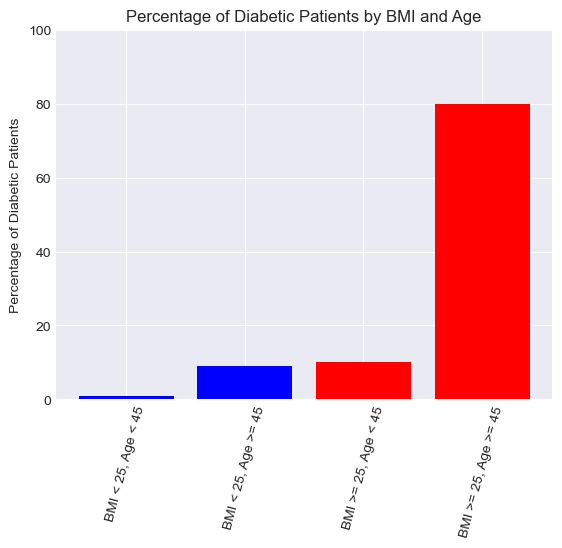

In [14]:
yaxis = [x*100 for x in summary_3a["diabetes"]]
plt.style.use('seaborn-v0_8-darkgrid')
plt.bar([0,1,2,3], yaxis, color=["blue", "blue", "red", "red"])
plt.xticks([0,1,2,3], ["BMI < 25, Age < 45", "BMI < 25, Age >= 45", "BMI >= 25, Age < 45", "BMI >= 25, Age >= 45"], rotation=75)
plt.ylim(0, 100)
plt.ylabel("Percentage of Diabetic Patients")
plt.title("Percentage of Diabetic Patients by BMI and Age")
plt.show()

### 2. Diabetic Patients by Heart Disease and Hypertension

Surprisingly, most diabetic patients in this data did not have hypertension or heart disease.

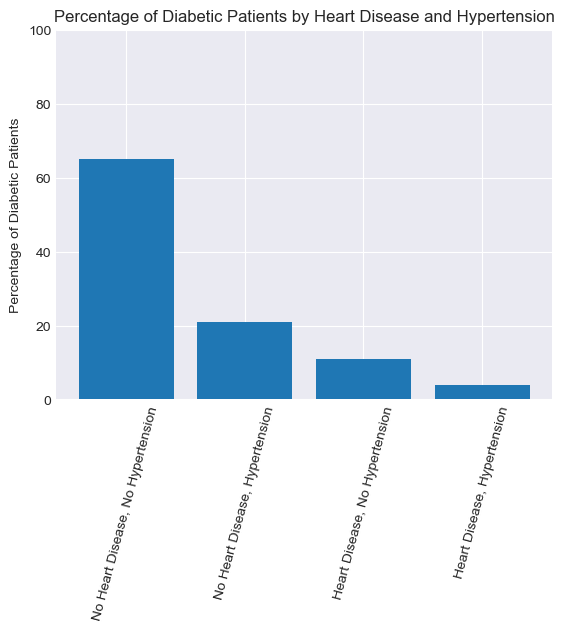

In [15]:
yaxis1 = [x*100 for x in summary_2a["diabetes"]]
plt.bar([0,1,2,3], yaxis1)
plt.xticks([0,1,2,3], ["No Heart Disease, No Hypertension", "No Heart Disease, Hypertension", "Heart Disease, No Hypertension", "Heart Disease, Hypertension"], rotation=75)
plt.ylim(0, 100)
plt.ylabel("Percentage of Diabetic Patients")
plt.title("Percentage of Diabetic Patients by Heart Disease and Hypertension")  
plt.show()

### 3. Diabetes by Age and BMI

This scatterplot shows the relationship between age and BMI among diabetic patients. A main cluster forms after the age of 45, between BMI levels of 25 and 45.

<Axes: title={'center': 'Diabetes by Age and BMI'}, xlabel='age', ylabel='bmi'>

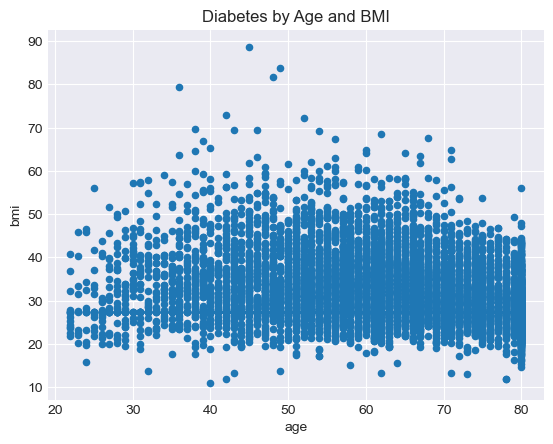

In [16]:
diabetes_df.plot.scatter(x='age', y='bmi', title= 'Diabetes by Age and BMI')

### 4. Age by Diabetes Status

This boxplot compares age distributions between patients with and without diabetes. The mean age is higher for diabetic patients, 61.7 years, compared to patients without diabetes, 49.43 years.

In [17]:
def iqr(list, label):
    quartiles = list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"Quartiles and outliers for {label}:")
    print()
    print(f"Lower quartile: {lowerq}")
    print(f"upper quartile: {upperq}")
    print(f"Interquartile Range: {round(iqr, 2)}")
    print(f"Median: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound, 2)} could be outliers.")
    print(f"Values above {round(upper_bound, 2)} could be outliers.")
    print()
    print()

Quartiles and outliers for Age - No Diabetes:

Lower quartile: 35.0
upper quartile: 62.0
Interquartile Range: 27.0
Median: 48.0 
Values below -5.5 could be outliers.
Values above 102.5 could be outliers.


Quartiles and outliers for Age - Diabetes:

Lower quartile: 53.0
upper quartile: 73.0
Interquartile Range: 20.0
Median: 63.0 
Values below 23.0 could be outliers.
Values above 103.0 could be outliers.




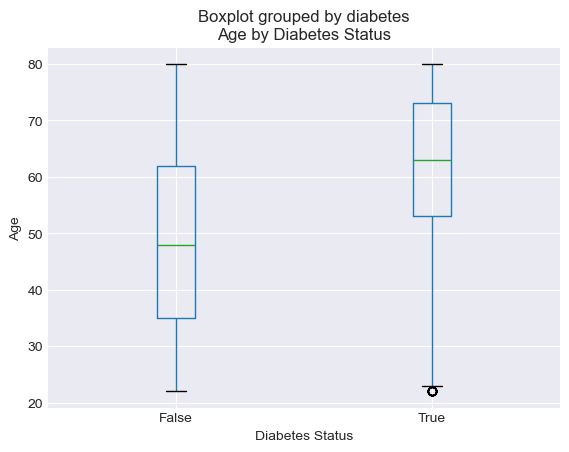

In [18]:
plot_3 = clean_df.boxplot("age", "diabetes").set_title("Age by Diabetes Status")
plt.ylabel("Age")
plt.xlabel("Diabetes Status")

iqr(clean_df[clean_df["diabetes"] == False]["age"], "Age - No Diabetes")
iqr(diabetes_df["age"], "Age - Diabetes")

### 5. BMI by Diabetes Status

The trends in this visualization are not as clear as in the previous, but the difference between the distributions can still be seen. The mean BMI for diabetic patients, 32.12 kg/m², is higher than the BMI of patients without diabetes, 28.39 kg/m².

Quartiles and outliers for BMI - No Diabetes:

Lower quartile: 25.6
upper quartile: 30.15
Interquartile Range: 4.55
Median: 27.32 
Values below 18.78 could be outliers.
Values above 36.97 could be outliers.


Quartiles and outliers for BMI - Diabetes:

Lower quartile: 27.32
upper quartile: 36.01
Interquartile Range: 8.69
Median: 30.06 
Values below 14.29 could be outliers.
Values above 49.04 could be outliers.




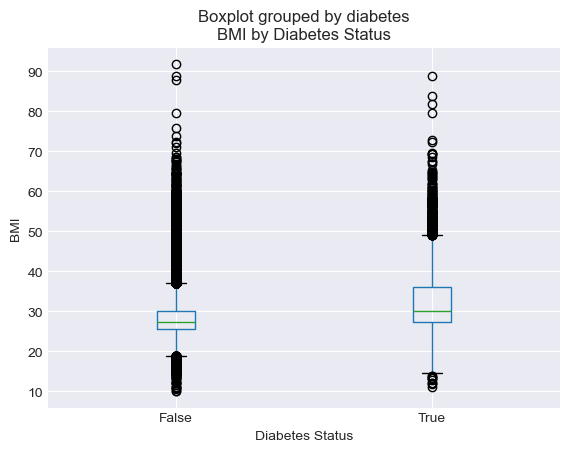

In [19]:
plot_4 = clean_df.boxplot("bmi", "diabetes").set_title("BMI by Diabetes Status")
plt.ylabel("BMI")
plt.xlabel("Diabetes Status")

iqr(clean_df[clean_df["diabetes"] == False]["bmi"], "BMI - No Diabetes")
iqr(diabetes_df["bmi"], "BMI - Diabetes")

### 6. HbA1c Level by Diabetes Status

HbA1c Level is typically the main factor in determining whether one has diabetes, so the clear contrast in this graph reflects that. It's not the case for all of the patients in the dataset, but it applies to most of them. 6.9% was the average HbA1c level for patients with diabetes, while the average HbA1c level for patients without diabetes was 5.4%.

Quartiles and outliers for BMI - No Diabetes:

Lower quartile: 25.6
upper quartile: 30.15
Interquartile Range: 4.55
Median: 27.32 
Values below 18.78 could be outliers.
Values above 36.97 could be outliers.


Quartiles and outliers for BMI - Diabetes:

Lower quartile: 27.32
upper quartile: 36.01
Interquartile Range: 8.69
Median: 30.06 
Values below 14.29 could be outliers.
Values above 49.04 could be outliers.




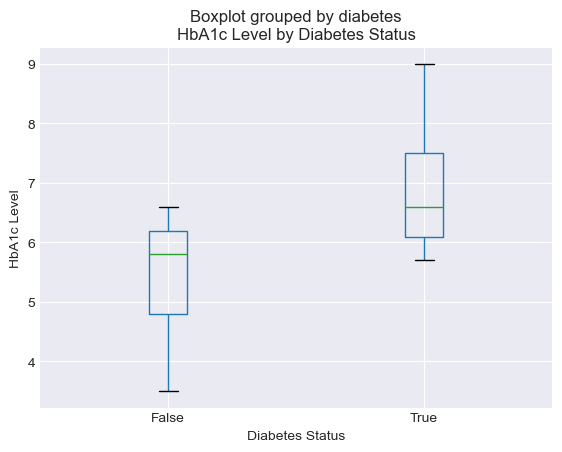

In [20]:
plot_5 = clean_df.boxplot("HbA1c_level", "diabetes").set_title("HbA1c Level by Diabetes Status")
plt.ylabel("HbA1c Level")
plt.xlabel("Diabetes Status")

iqr(clean_df[clean_df["diabetes"] == False]["bmi"], "BMI - No Diabetes")
iqr(diabetes_df["bmi"], "BMI - Diabetes")

### 7. Blood Glucose Level by Diabetes Status

Blood glucose level is another closely related factor to a patient's diabetes status. The average blood glucose level for patients with diabetes was 194.4mg/dL, compared to patients without diabetes, 132 mg/dL.

Quartiles and outliers for HbA1c Level - No Diabetes:

Lower quartile: 4.8
upper quartile: 6.2
Interquartile Range: 1.4
Median: 5.8 
Values below 2.7 could be outliers.
Values above 8.3 could be outliers.


Quartiles and outliers for HbA1c Level - Diabetes:

Lower quartile: 6.1
upper quartile: 7.5
Interquartile Range: 1.4
Median: 6.6 
Values below 4.0 could be outliers.
Values above 9.6 could be outliers.




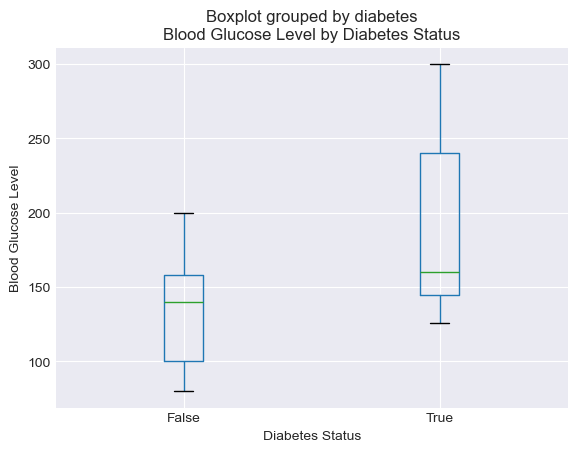

In [21]:
plot_6 = clean_df.boxplot("blood_glucose_level", "diabetes").set_title("Blood Glucose Level by Diabetes Status")
plt.ylabel("Blood Glucose Level")
plt.xlabel("Diabetes Status")

iqr(clean_df[clean_df["diabetes"] == False]["HbA1c_level"], "HbA1c Level - No Diabetes")
iqr(diabetes_df["HbA1c_level"], "HbA1c Level - Diabetes")

### Summary

This is the extent to which we conducted our analysis. Further information can be found in the README file in the repository, where we elaborate on the findings of the data and discuss limitations, as well as possible next steps.